# Analiza plezalnih vzponov v slovenskih plezališčih

## Zajemanje podatkov
Javascript na strani 8a.nu/ascents glede na zahtevane parametre vrne urejen JSON zadnjih 10.000 vzponov v Sloveniji. Žal to ni dovolj za dobro analizo, saj podatki ne sežejo dlje od leta 2018. Zato sem podatke dobil na nasilen način.

### Zajete spletne strani in [regex](https://en.wikipedia.org/wiki/Inferno_(Dante)#Ninth_Circle_(Treachery))

- [Seznam plezališč](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/plezalisca.json) sem pridobil s funkcijama [`vsa_slovenska_plezalisca_in_balvanisca()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/nalozi_podatke.py#L13) in [`strik_v_json`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/parse_plezalisca.py#L13).
- Za vsako plezališče sem pridobil [html datoteko](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/vzponi_bohinjska-bela.html) z uporabo funkcije [`vsi_vzponi_v_plezaliscih()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/nalozi_podatke.py#L34) in izluščil podatke s pomočjo demonov, ki jih prikliče [`vzponi_strik_v_json_csv()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/parse_plezalisca.py#L72).

Urejeni podatki so shranjeni v datoteki [vzponi_strik.csv](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/vzponi_strik.csv).


# Analiza
## Priprava podatkov
Pripravimo vse tabele, ker itak nimam več pojma kaj je kej. TODO

In [18]:
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows', 10)
vzponi = pd.read_csv('data/vzponi.csv')
plezalci = pd.read_csv('data/plezalci.csv')
smeri = pd.read_csv('data/smeri.csv')
vzponi = pd.read_csv('data/vzponi.csv')
plezalisca = pd.read_csv('data/plezalisca.csv')

smeri

,smer-plezalisce,id
0,Kopfüber osp-misja-pec,0
1,Danger zone osp-misja-pec,1
2,Hugolina osp-misja-pec,2
3,Cebelica Maja osp-misja-pec,3
4,Maeva osp-misja-pec,4
...,...,...
38682,Stelutis vrsic,38682
38683,Luna Magnus vrsic,38683
38684,Caramba vrsic,38684
38685,Carambita vrsic,38685


## Osnovni rezultati
Sledi nekaj osnovnih opazk o podatkih.

### Velikosti plezališč
Mera za velikost naj bo število smeri. 


### Najbolj obiskana plezališča
Velikosti posameznih plezališč sovpadajo z obiskanostjo. Poleg primorske je blazno obiskan še Kotečnik.

<AxesSubplot:title={'center':'Obiskanost plezališč'}, ylabel='število vzponov'>

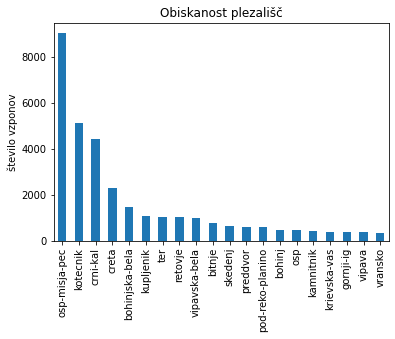

In [12]:
plezalisca.groupby('plezalisce').size().sort_values(ascending=False).head(20).plot.bar(title='Obiskanost plezališč', xlabel='', ylabel="število vzponov")